In [65]:
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 11

In [1]:
import pandas as pd

In [2]:
emis = pd.read_excel('env_air_emis__custom_16946228_spreadsheet.xlsx', sheet_name=None) # Passing sheet_name=None returs a dict of all sheets

In [3]:
emis.keys()

dict_keys(['Data', 'org', 'pm10', 'pm25', 'nh3', 'sox', 'nox'])

In [4]:
def clean_data(df):
    df = df.copy()[2:]
    df.dropna(axis=1, how='all', inplace=True)
    index_name = 'NAME'
    df.rename(columns={'TIME': index_name}, inplace=True)
    df.set_index(index_name, inplace=True)
    return df

In [5]:
import geopandas as gpd

In [6]:
europe = gpd.read_file('https://raw.githubusercontent.com/leakyMirror/map-of-europe/27a335110674ae5b01a84d3501b227e661beea2b/GeoJSON/europe.geojson')

(-25.0, 45.0, 30.0, 72.0)

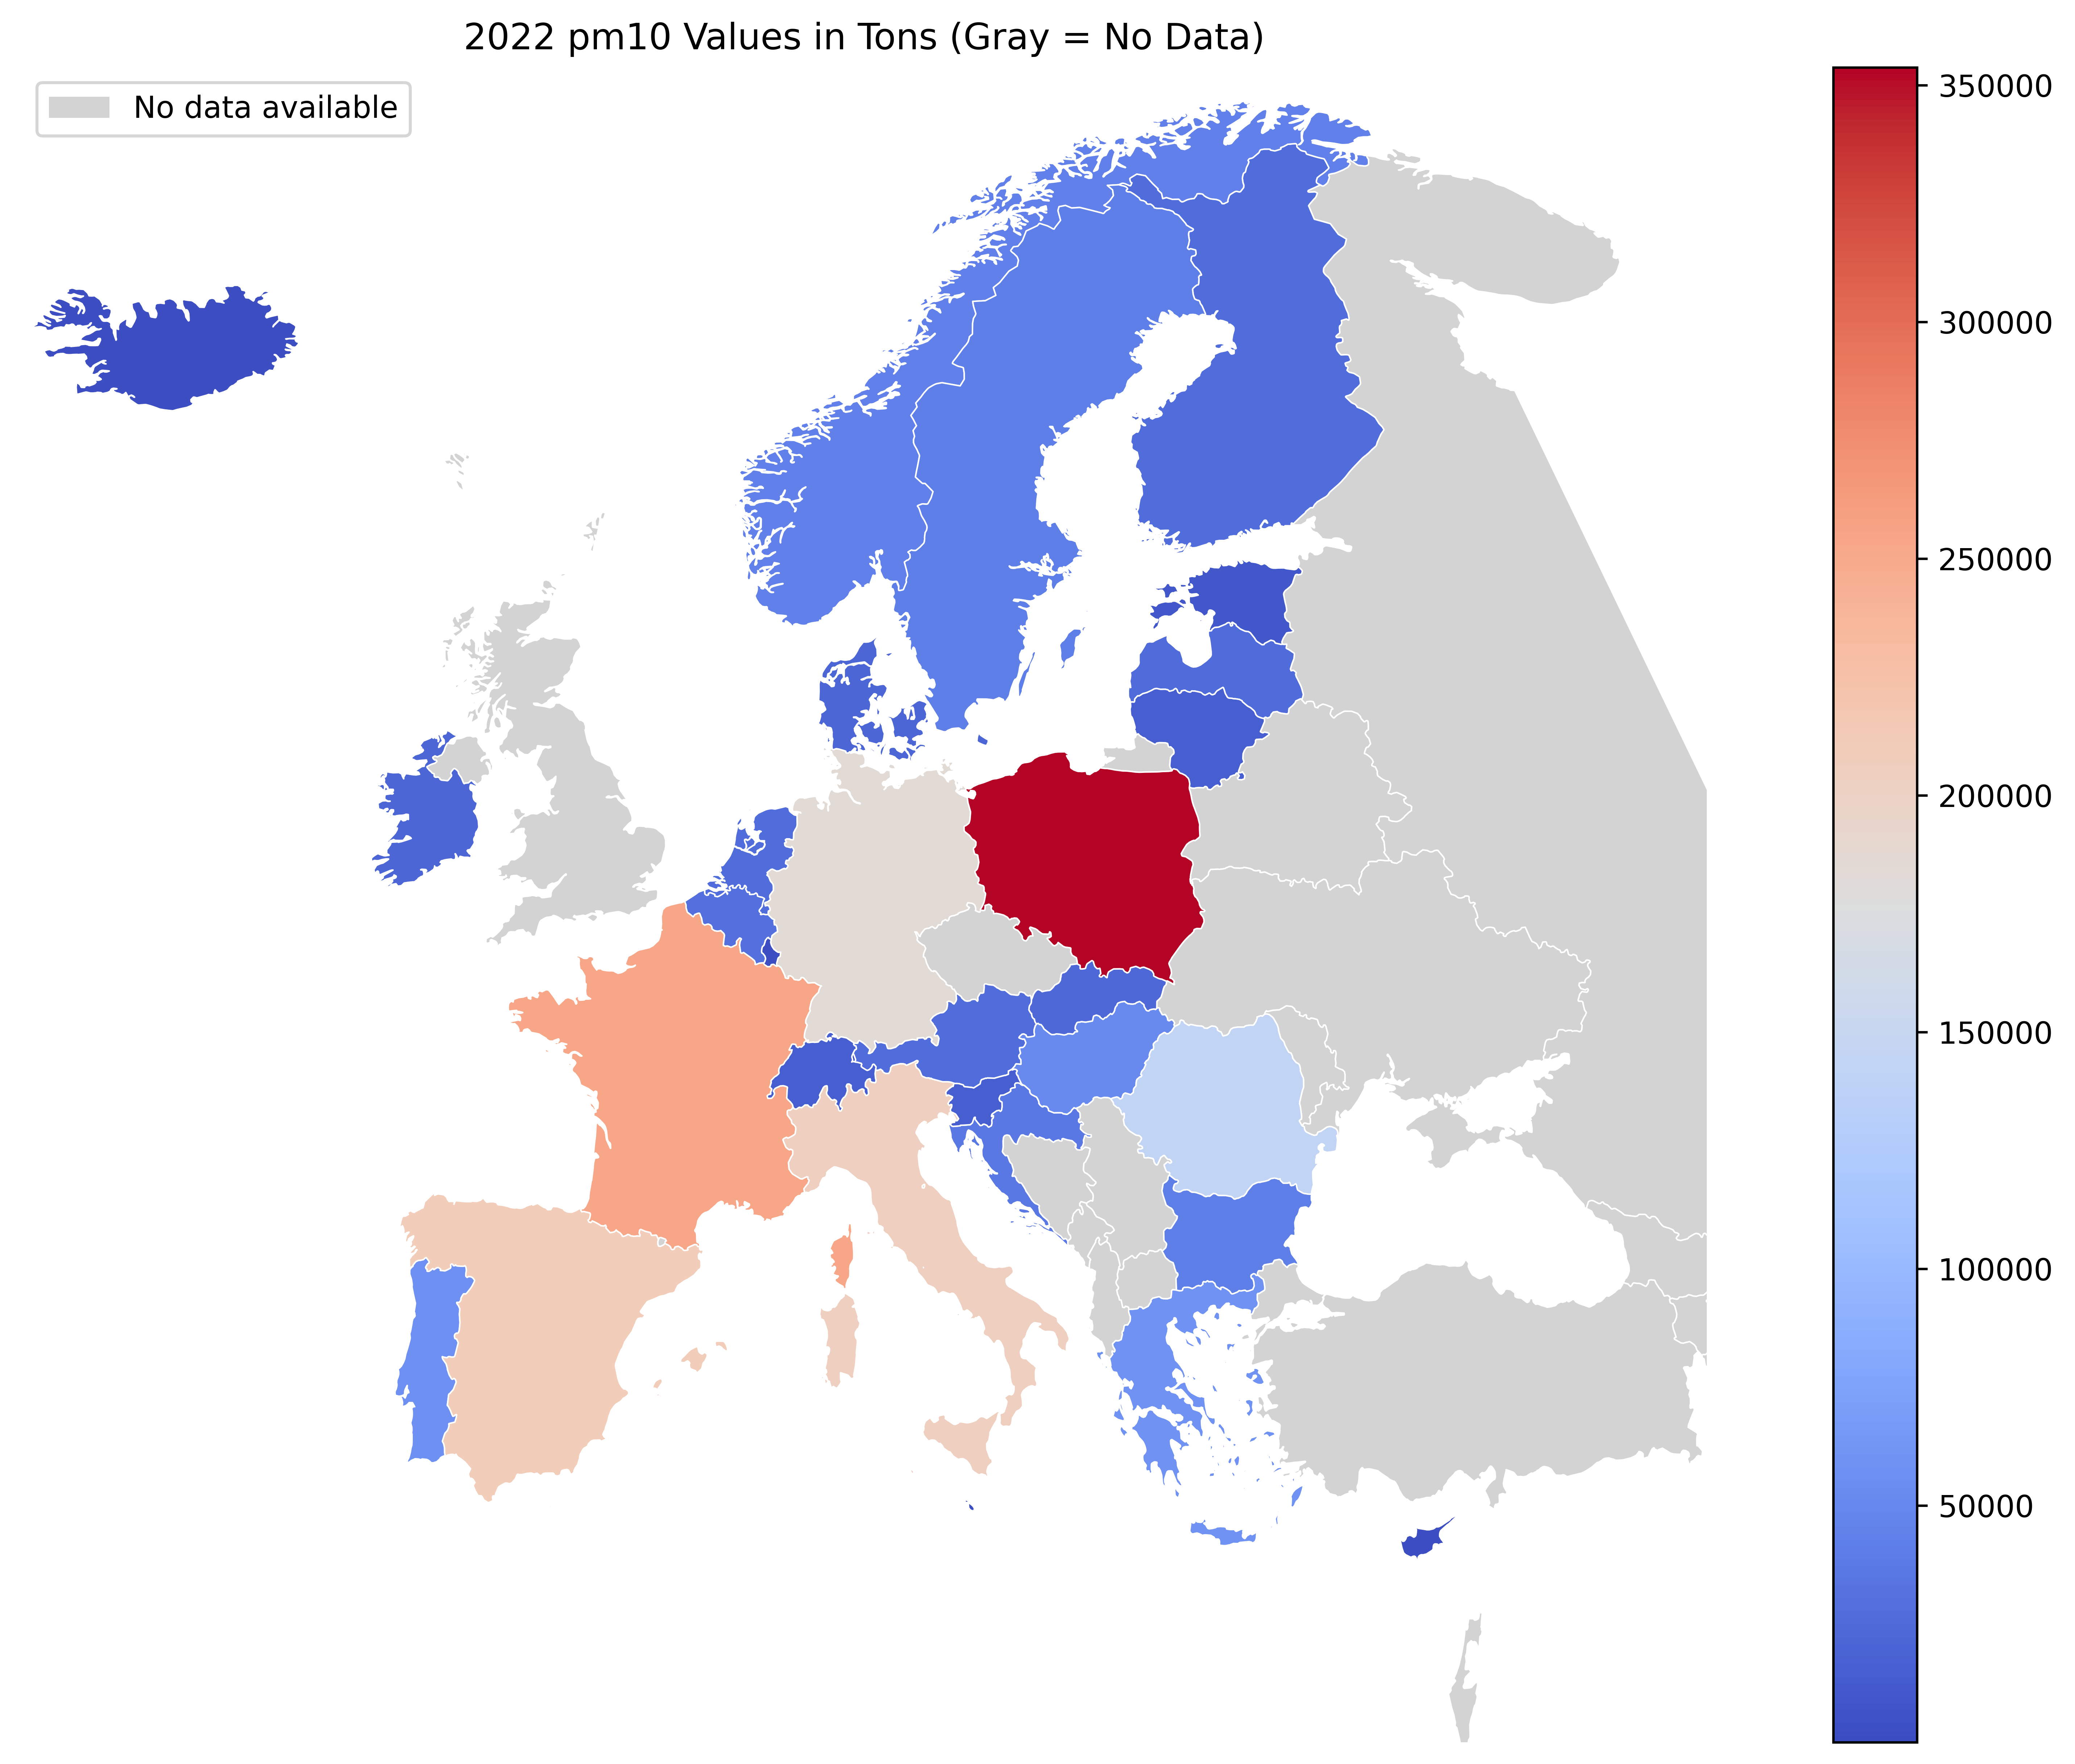

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

year = '2022'
pol = 'pm10'

pol_data = clean_data(emis[pol])

gdf = europe.join(pol_data, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='coolwarm', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} Values in Tons (Gray = No Data)')
ax.axis('off')

In [8]:
gdp_cap = pd.read_excel('gdp_yearly.xlsx', sheet_name='clean')

gdp_cap.head()

Country   2014   2015   2016   2017   2018   2019   2020   2021   2022  \
0   Belgium  36000  37000  38000  39100  40300  41700  40200  43700  48200   
1  Bulgaria   6100   6600   7100   7700   8400   9300   9500  11000  13300   
2   Czechia  15100  16200  17000  18700  20300  21700  21000  23400  26700   
3   Denmark  47100  47900  49300  51100  52000  53000  53500  59000  64700   
4   Germany  36100  37000  38100  39500  40600  42500  41500  44200  47200   

    2023  
0  50600  
1  14700  
2  29200  
3  63300  
4  49500

In [9]:
import numpy as np
def fill_semicolons(x):
    if x == ':':
        return np.nan
    return x

In [10]:
pm10_2022 = clean_data(emis['pm10']).reset_index().rename(columns={'NAME':'Country'}).set_index('Country')['2022'].rename('pm10')

In [11]:
gdp_cap_2022 = gdp_cap.set_index('Country')[2022].map(fill_semicolons).rename('GDP per cap')

In [12]:
pop_df = pd.read_excel('pop.xlsx', sheet_name='clean')

In [13]:
pop = pop_df.iloc[1:].rename(columns={'TIME':'Country'}).set_index('Country')['2022'].rename('population').map(fill_semicolons)

In [14]:
pop

Country
Belgium            11617623.0
Bulgaria            6482484.0
Czechia            10516707.0
Denmark             5873420.0
Germany            83237124.0
Estonia             1331796.0
Ireland             5154277.0
Greece             10459782.0
Spain              47486843.0
France             68091703.0
Croatia             3862305.0
Italy              59030133.0
Cyprus               929764.0
Latvia              1875757.0
Lithuania           2805998.0
Luxembourg           645397.0
Hungary             9610403.0
Malta                520174.0
Netherlands        17590672.0
Austria             8978929.0
Poland             36889761.0
Portugal           10421117.0
Romania            19042455.0
Slovenia            2107180.0
Slovakia            5434712.0
Finland             5548241.0
Sweden             10452326.0
Iceland              376248.0
Liechtenstein         39308.0
Norway              5425270.0
Switzerland         8738791.0
United Kingdom            NaN
Montenegro           617683.0
No

In [15]:
gdp_2022 = pd.concat([gdp_cap_2022, pop], axis=1)

In [16]:
gdp_2022['gdp'] = gdp_2022['GDP per cap'] * gdp_2022['population']

In [17]:
gdp_2022

GDP per cap  population           gdp
Country                                               
Belgium              48200.0  11617623.0  5.599694e+11
Bulgaria             13300.0   6482484.0  8.621704e+10
Czechia              26700.0  10516707.0  2.807961e+11
Denmark              64700.0   5873420.0  3.800103e+11
Germany              47200.0  83237124.0  3.928792e+12
Estonia              27400.0   1331796.0  3.649121e+10
Ireland             100200.0   5154277.0  5.164586e+11
Greece               19600.0  10459782.0  2.050117e+11
Spain                28700.0  47486843.0  1.362872e+12
France               39000.0  68091703.0  2.655576e+12
Croatia              17300.0   3862305.0  6.681788e+10
Italy                33800.0  59030133.0  1.995218e+12
Cyprus               32200.0    929764.0  2.993840e+10
Latvia               19100.0   1875757.0  3.582696e+10
Lithuania            23800.0   2805998.0  6.678275e+10
Luxembourg          118300.0    645397.0  7.635047e+10
Hungary              17600.0   9610403.0  1.691431e+11
Malta                34300.0    520174.0  1.784197e+10
Netherlands          56100.0  17590672.0  9.868367e+11
Austria              49500.0   8978929.0  4.444570e+11
Poland               17500.0  36889761.0  6.455708e+11
Portugal             23300.0  10421117.0  2.428120e+11
Romania              14800.0  19042455.0  2.818283e+11
Slovenia             27000.0   2107180.0  5.689386e+10
Slovakia             20200.0   5434712.0  1.097812e+11
Finland              47900.0   5548241.0  2.657607e+11
Sweden               52400.0  10452326.0  5.477019e+11
Norway                   NaN   5425270.0           NaN
Switzerland              NaN   8738791.0           NaN
Montenegro            9600.0    617683.0  5.929757e+09
North Macedonia       7200.0   1837114.0  1.322722e+10
Albania                  NaN   2793592.0           NaN
Serbia                9500.0   6797105.0  6.457250e+10
Türkiye              10100.0  84680273.0  8.552708e+11
Iceland                  NaN    376248.0           NaN
Liechtenstein            NaN     39308.0           NaN
United Kingdom           NaN         NaN           NaN

In [18]:
raw_2022 = pd.concat([pm10_2022, gdp_2022], axis=1)

In [19]:
import seaborn as sns

<Axes: xlabel='gdp', ylabel='pm10'>

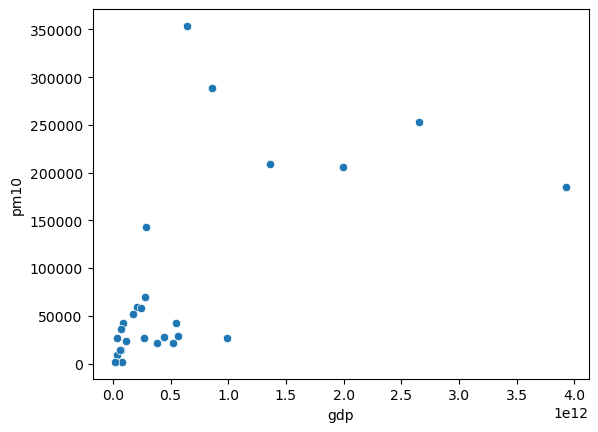

In [20]:
sns.scatterplot(raw_2022, x='gdp', y='pm10')

In [21]:
raw_2022['ratio'] = raw_2022['pm10'] / raw_2022['gdp']

In [22]:
col = dict(zip(raw_2022.dropna().index, ['#0082b4'] * len(raw_2022)))

<Axes: xlabel='population', ylabel='Country'>

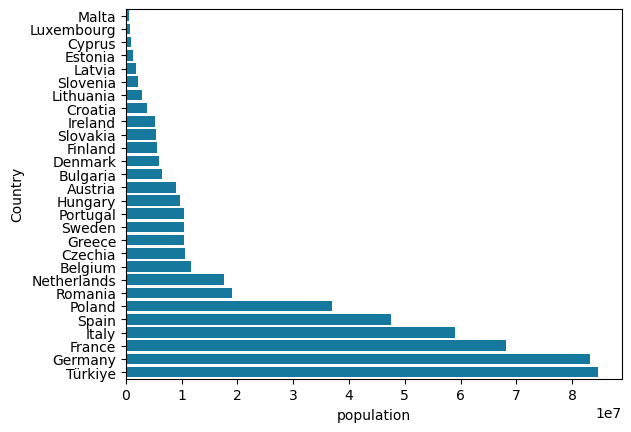

In [23]:
sns.barplot(raw_2022.reset_index().sort_values('population').dropna(), y='Country', x='population', palette=col)

<Axes: xlabel='gdp', ylabel='Country'>

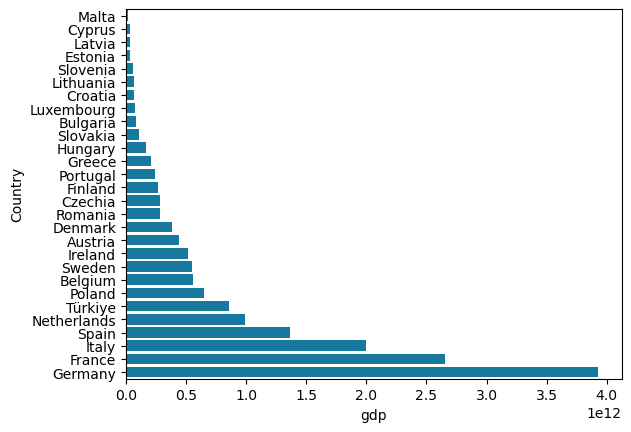

In [24]:
sns.barplot(raw_2022.reset_index().sort_values('gdp').dropna(), y='Country', x='gdp', palette=col)

<Axes: xlabel='pm10', ylabel='Country'>

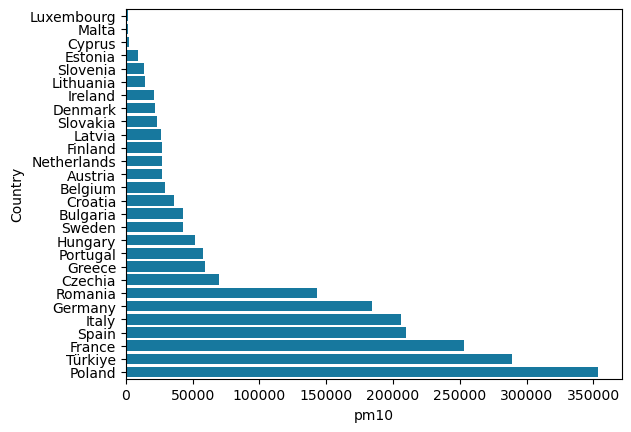

In [25]:
sns.barplot(raw_2022.reset_index().sort_values('pm10').dropna(), y='Country', x='pm10', palette=col)

<Axes: xlabel='ratio', ylabel='Country'>

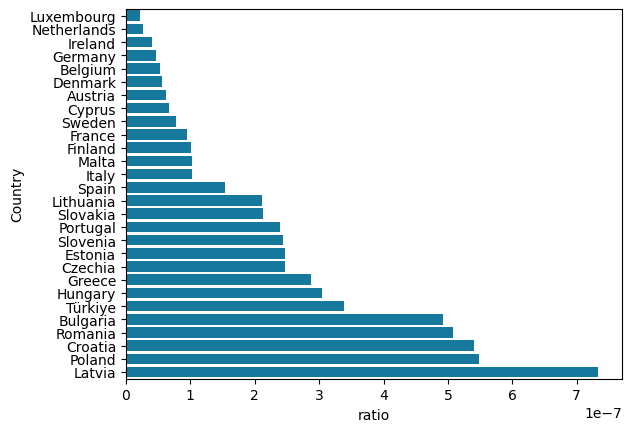

In [26]:
sns.barplot(raw_2022.reset_index().sort_values('ratio').dropna(), y='Country', x='ratio', palette=col)

(-25.0, 45.0, 30.0, 72.0)

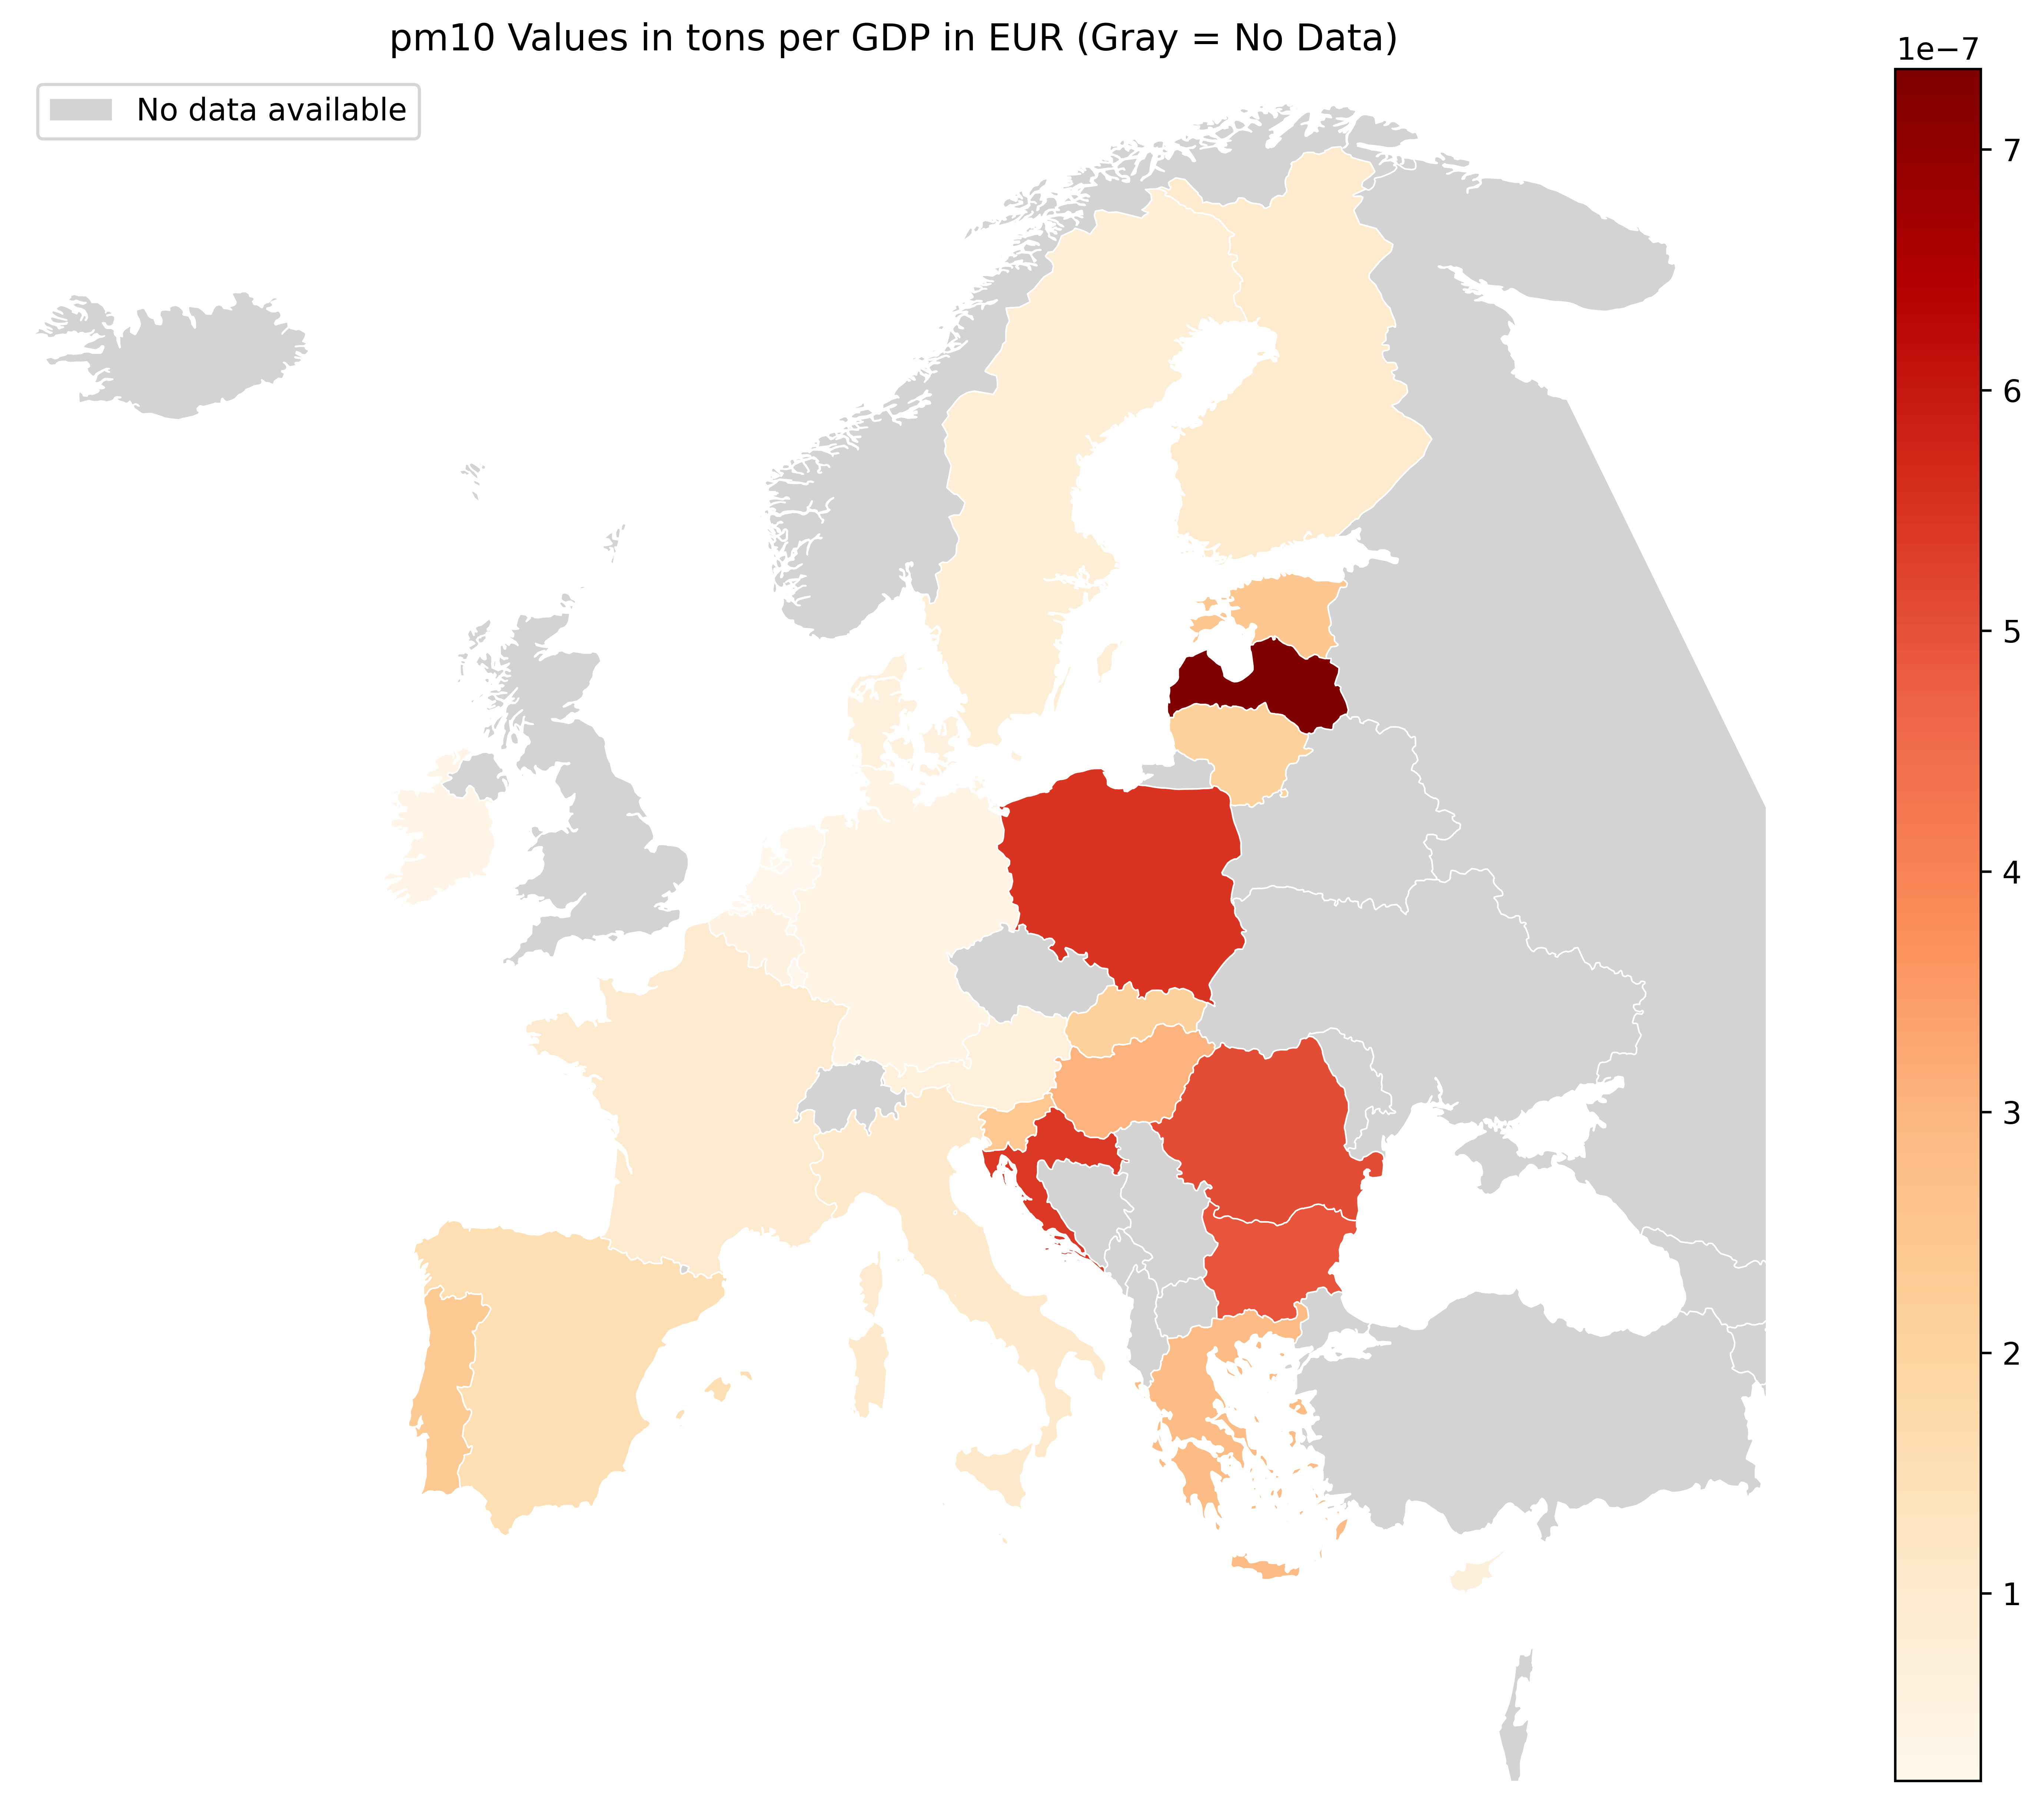

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)



gdf = europe.join(raw_2022['ratio'], on='NAME', how='left')

no_data = gdf[gdf['ratio'].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf['ratio'].notna()]
has_data.plot(ax=ax, column='ratio', cmap='OrRd', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'pm10 Values in tons per GDP in EUR (Gray = No Data)')
ax.axis('off')

(-25.0, 45.0, 30.0, 72.0)

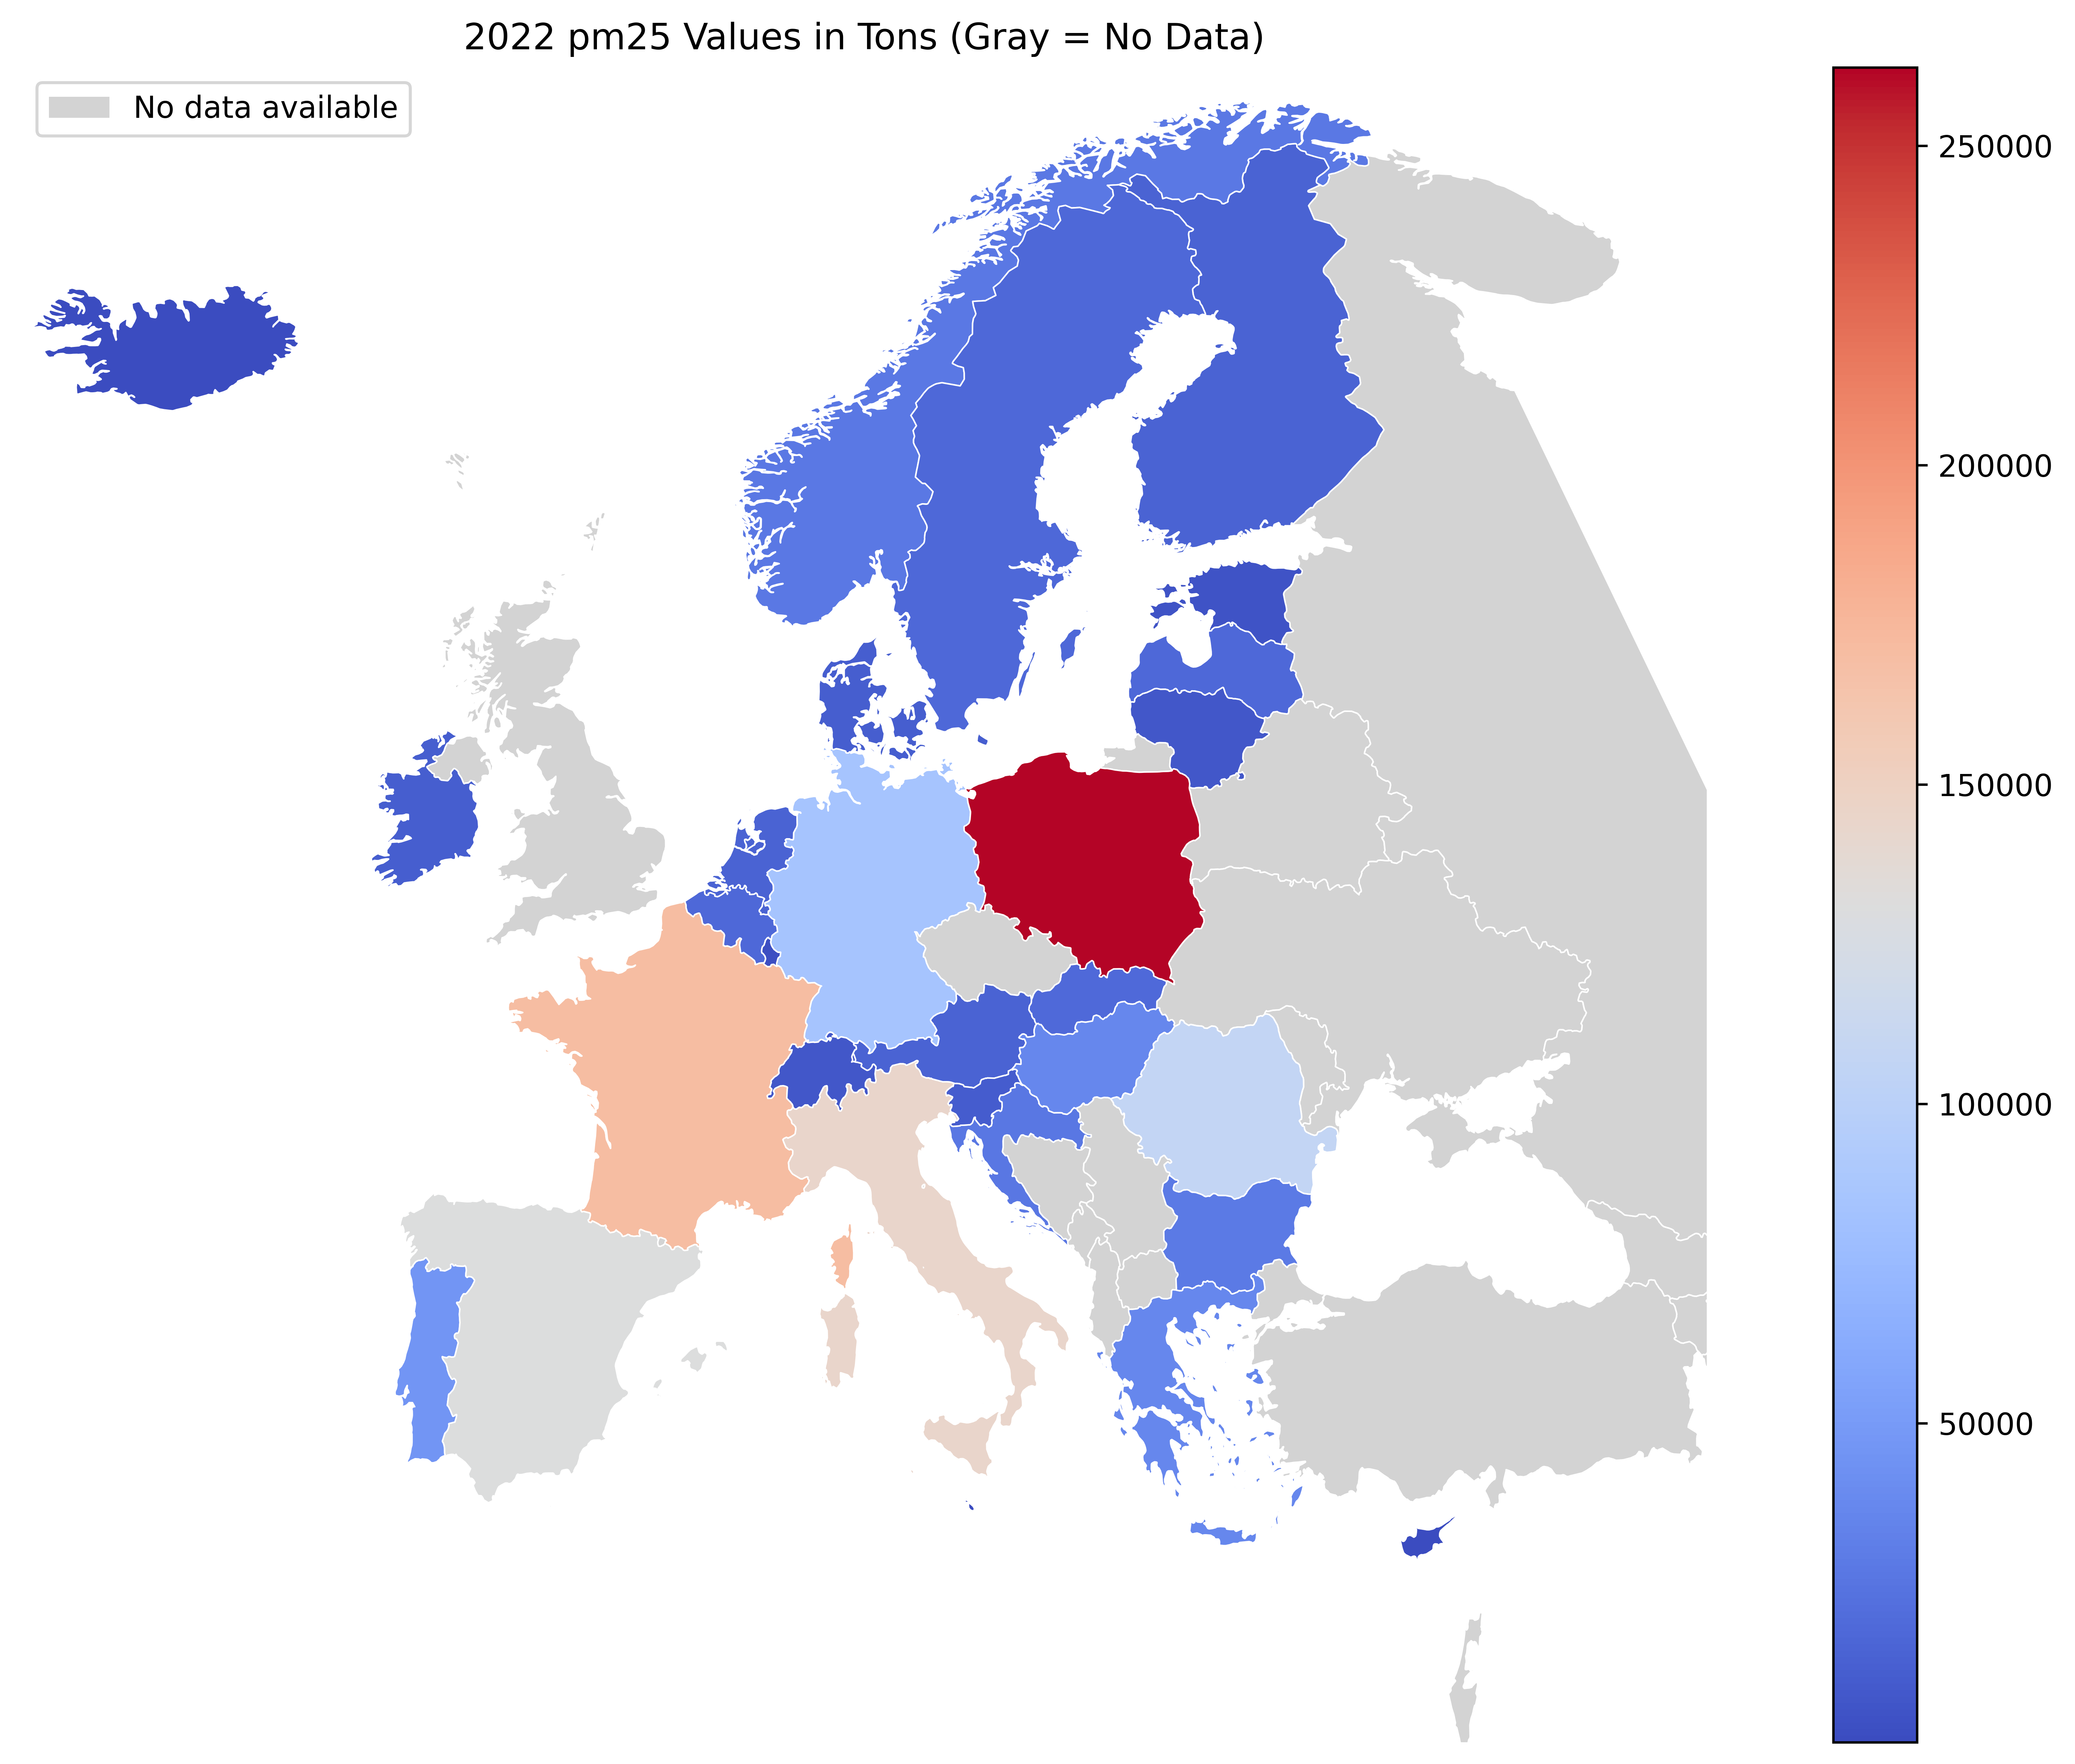

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)

year = '2022'
pol = 'pm25'

pol_data = clean_data(emis[pol])

gdf = europe.join(pol_data, on='NAME', how='left')

no_data = gdf[gdf[year].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf[year].notna()]
has_data.plot(ax=ax, column=year, cmap='coolwarm', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'{year} {pol} Values in Tons (Gray = No Data)')
ax.axis('off')

In [37]:
pm25_2022 = emis['pm25'].rename(columns={'TIME':'Country'}).set_index('Country')['2022'].iloc[2:]

In [42]:
raw_2022 = pd.concat([raw_2022, pm25_2022.rename('pm25')], axis=1)

<Axes: xlabel='pm10', ylabel='pm25'>

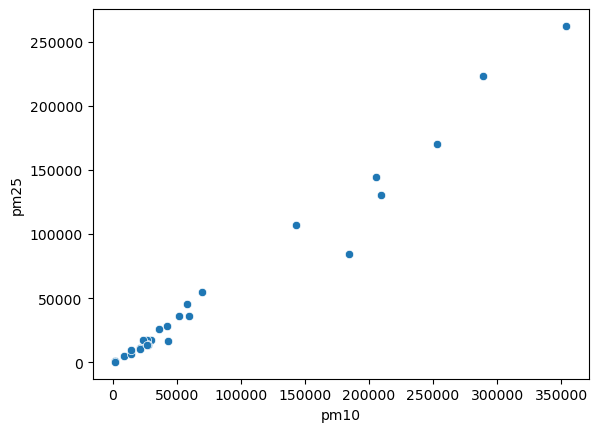

In [46]:
sns.scatterplot(raw_2022.dropna(), x='pm10', y='pm25')

In [47]:
raw_2022['pm_ratio'] = raw_2022['pm25'] / raw_2022['pm10']

<Axes: xlabel='pm_ratio', ylabel='Count'>

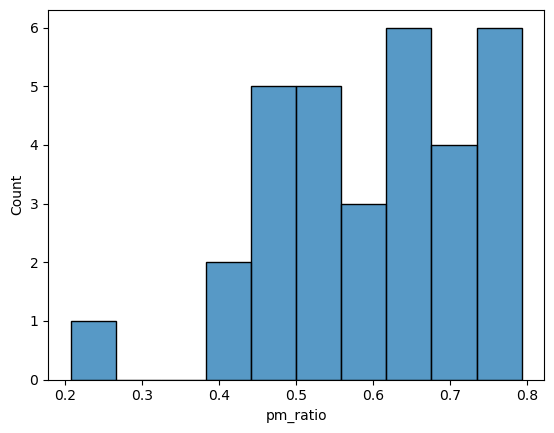

In [49]:
sns.histplot(raw_2022, x='pm_ratio', bins=10)

In [50]:
raw_2022

pm10  GDP per cap  population           gdp  \
Country                                                            
Belgium           29353.0      48200.0  11617623.0  5.599694e+11   
Bulgaria          42448.0      13300.0   6482484.0  8.621704e+10   
Czechia           69473.0      26700.0  10516707.0  2.807961e+11   
Denmark           21428.0      64700.0   5873420.0  3.800103e+11   
Germany          184558.0      47200.0  83237124.0  3.928792e+12   
Estonia            9015.0      27400.0   1331796.0  3.649121e+10   
Ireland           21030.0     100200.0   5154277.0  5.164586e+11   
Greece            59032.0      19600.0  10459782.0  2.050117e+11   
Spain            209441.0      28700.0  47486843.0  1.362872e+12   
France           253063.0      39000.0  68091703.0  2.655576e+12   
Croatia           36156.0      17300.0   3862305.0  6.681788e+10   
Italy            205689.0      33800.0  59030133.0  1.995218e+12   
Cyprus             1998.0      32200.0    929764.0  2.993840e+10   
Latvia            26277.0      19100.0   1875757.0  3.582696e+10   
Lithuania         14147.0      23800.0   2805998.0  6.678275e+10   
Luxembourg         1689.0     118300.0    645397.0  7.635047e+10   
Hungary           51443.0      17600.0   9610403.0  1.691431e+11   
Malta              1833.0      34300.0    520174.0  1.784197e+10   
Netherlands       26880.0      56100.0  17590672.0  9.868367e+11   
Austria           27369.0      49500.0   8978929.0  4.444570e+11   
Poland           353748.0      17500.0  36889761.0  6.455708e+11   
Portugal          57922.0      23300.0  10421117.0  2.428120e+11   
Romania          143134.0      14800.0  19042455.0  2.818283e+11   
Slovenia          13900.0      27000.0   2107180.0  5.689386e+10   
Slovakia          23322.0      20200.0   5434712.0  1.097812e+11   
Finland           26778.0      47900.0   5548241.0  2.657607e+11   
Sweden            42680.0      52400.0  10452326.0  5.477019e+11   
Iceland            2168.0          NaN    376248.0           NaN   
Liechtenstein        35.0          NaN     39308.0           NaN   
Norway            43928.0          NaN   5425270.0           NaN   
Switzerland       14257.0          NaN   8738791.0           NaN   
Türkiye          289019.0      10100.0  84680273.0  8.552708e+11   
Montenegro            NaN       9600.0    617683.0  5.929757e+09   
North Macedonia       NaN       7200.0   1837114.0  1.322722e+10   
Albania               NaN          NaN   2793592.0           NaN   
Serbia                NaN       9500.0   6797105.0  6.457250e+10   
United Kingdom        NaN          NaN         NaN           NaN   

                        ratio      pm25  pm_ratio  
Country                                            
Belgium          5.241893e-08   17247.0  0.587572  
Bulgaria         4.923389e-07   28018.0  0.660055  
Czechia          2.474144e-07   55082.0  0.792855  
Denmark          5.638795e-08   11221.0  0.523661  
Germany          4.697576e-08   84291.0  0.456718  
Estonia          2.470458e-07    4910.0  0.544648  
Ireland          4.071963e-08   10775.0  0.512363  
Greece           2.879445e-07   36197.0  0.613176  
Spain            1.536762e-07  130333.0  0.622290  
France           9.529494e-08  170238.0  0.672710  
Croatia          5.411127e-07   26216.0  0.725080  
Italy            1.030910e-07  144192.0  0.701020  
Cyprus           6.673703e-08     986.0  0.493493  
Latvia           7.334421e-07   17129.0  0.651863  
Lithuania        2.118361e-07    6211.0  0.439033  
Luxembourg       2.212167e-08    1046.0  0.619301  
Hungary          3.041389e-07   36176.0  0.703225  
Malta            1.027353e-07     379.0  0.206765  
Netherlands      2.723855e-08   14295.0  0.531808  
Austria          6.157851e-08   13448.0  0.491359  
Poland           5.479616e-07  262277.0  0.741423  
Portugal         2.385467e-07   45233.0  0.780930  
Romania          5.078765e-07  107462.0  0.750779  
Slovenia         2.443146e-07    9638.0  0.693381  
Slovakia        

In [54]:
pd.Series(raw_2022['pm25'] / raw_2022['gdp'], name='pm25ratio')

Country
Belgium            3.079990e-08
Bulgaria           3.249706e-07
Czechia            1.961637e-07
Denmark            2.952815e-08
Germany            2.145468e-08
Estonia            1.345529e-07
Ireland            2.086324e-08
Greece             1.765606e-07
Spain              9.563111e-08
France             6.410586e-08
Croatia            3.923501e-07
Italy              7.226878e-08
Cyprus             3.293429e-08
Latvia             4.781037e-07
Lithuania          9.300306e-08
Luxembourg         1.369998e-08
Hungary            2.138781e-07
Malta              2.124205e-08
Netherlands        1.448568e-08
Austria            3.025715e-08
Poland             4.062715e-07
Portugal           1.862881e-07
Romania            3.813030e-07
Slovenia           1.694032e-07
Slovakia           1.626417e-07
Finland            5.036109e-08
Sweden             3.029933e-08
Iceland                     NaN
Liechtenstein               NaN
Norway                      NaN
Switzerland                 NaN


(-25.0, 45.0, 30.0, 72.0)

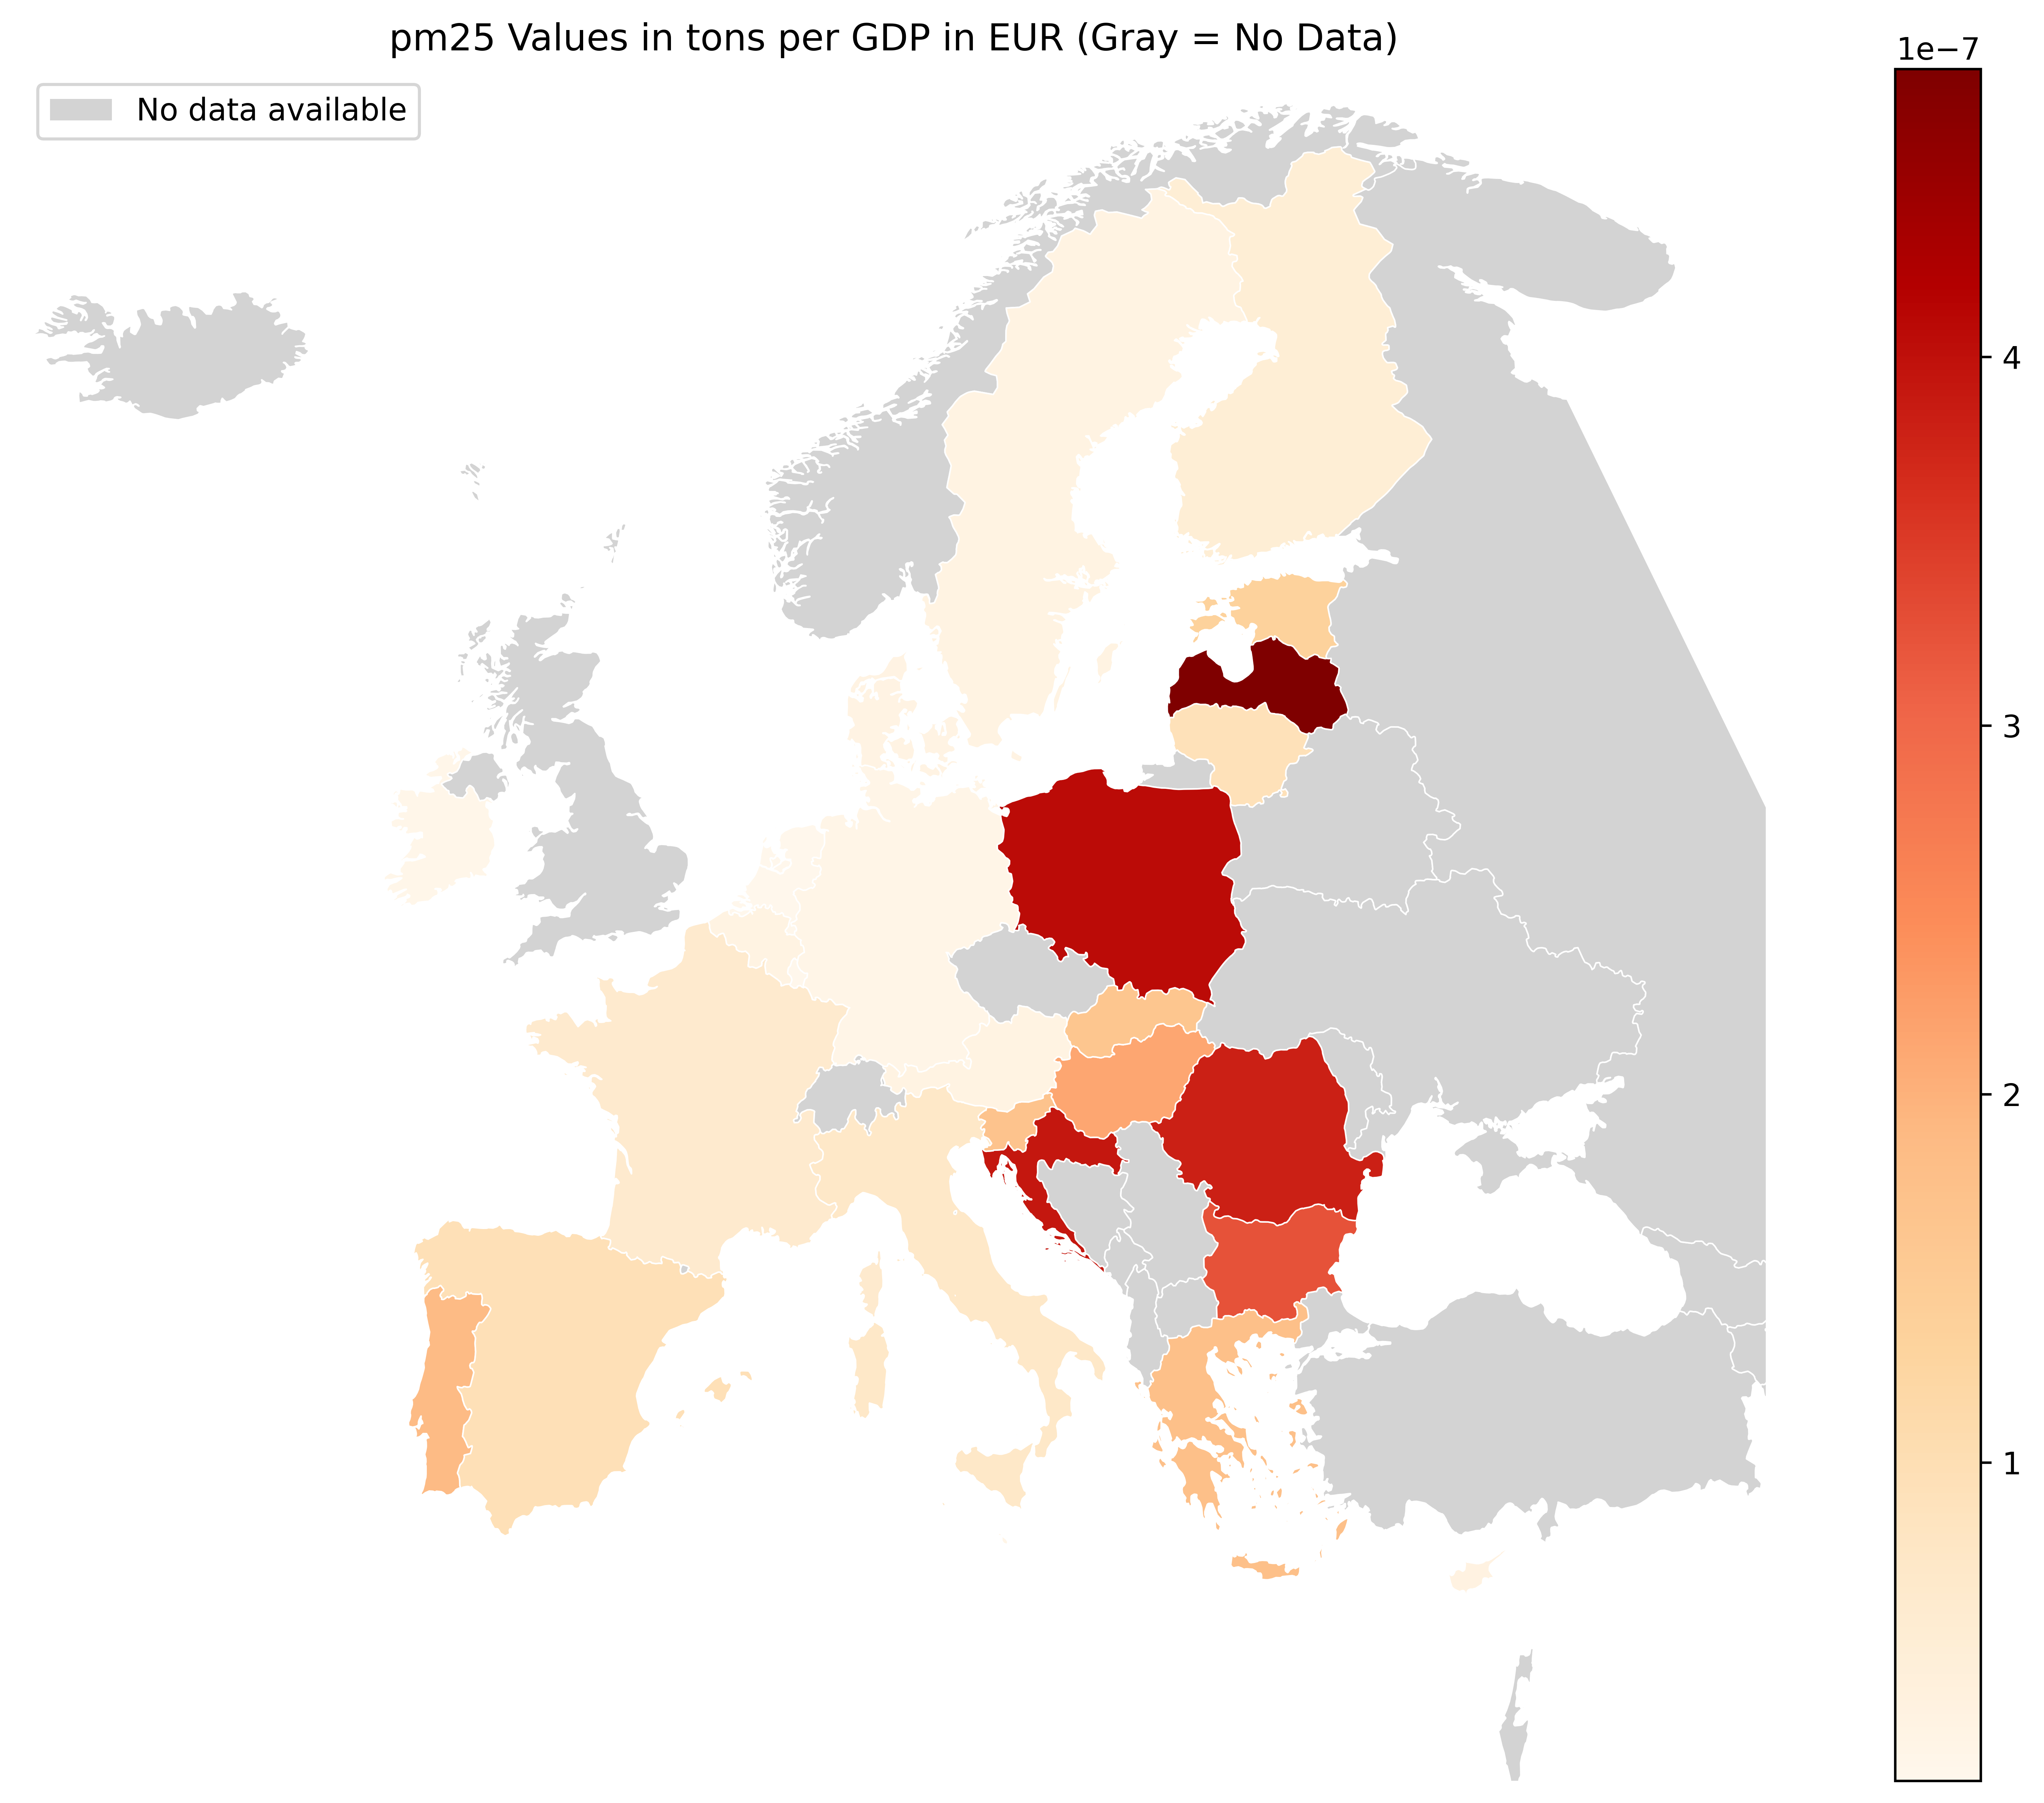

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10), dpi=600)



gdf = europe.join(pd.Series(raw_2022['pm25'] / raw_2022['gdp'], name='pm25ratio'), on='NAME', how='left')

no_data = gdf[gdf['pm25ratio'].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf['pm25ratio'].notna()]
has_data.plot(ax=ax, column='pm25ratio', cmap='OrRd', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'pm25 Values in tons per GDP in EUR (Gray = No Data)')
ax.axis('off')

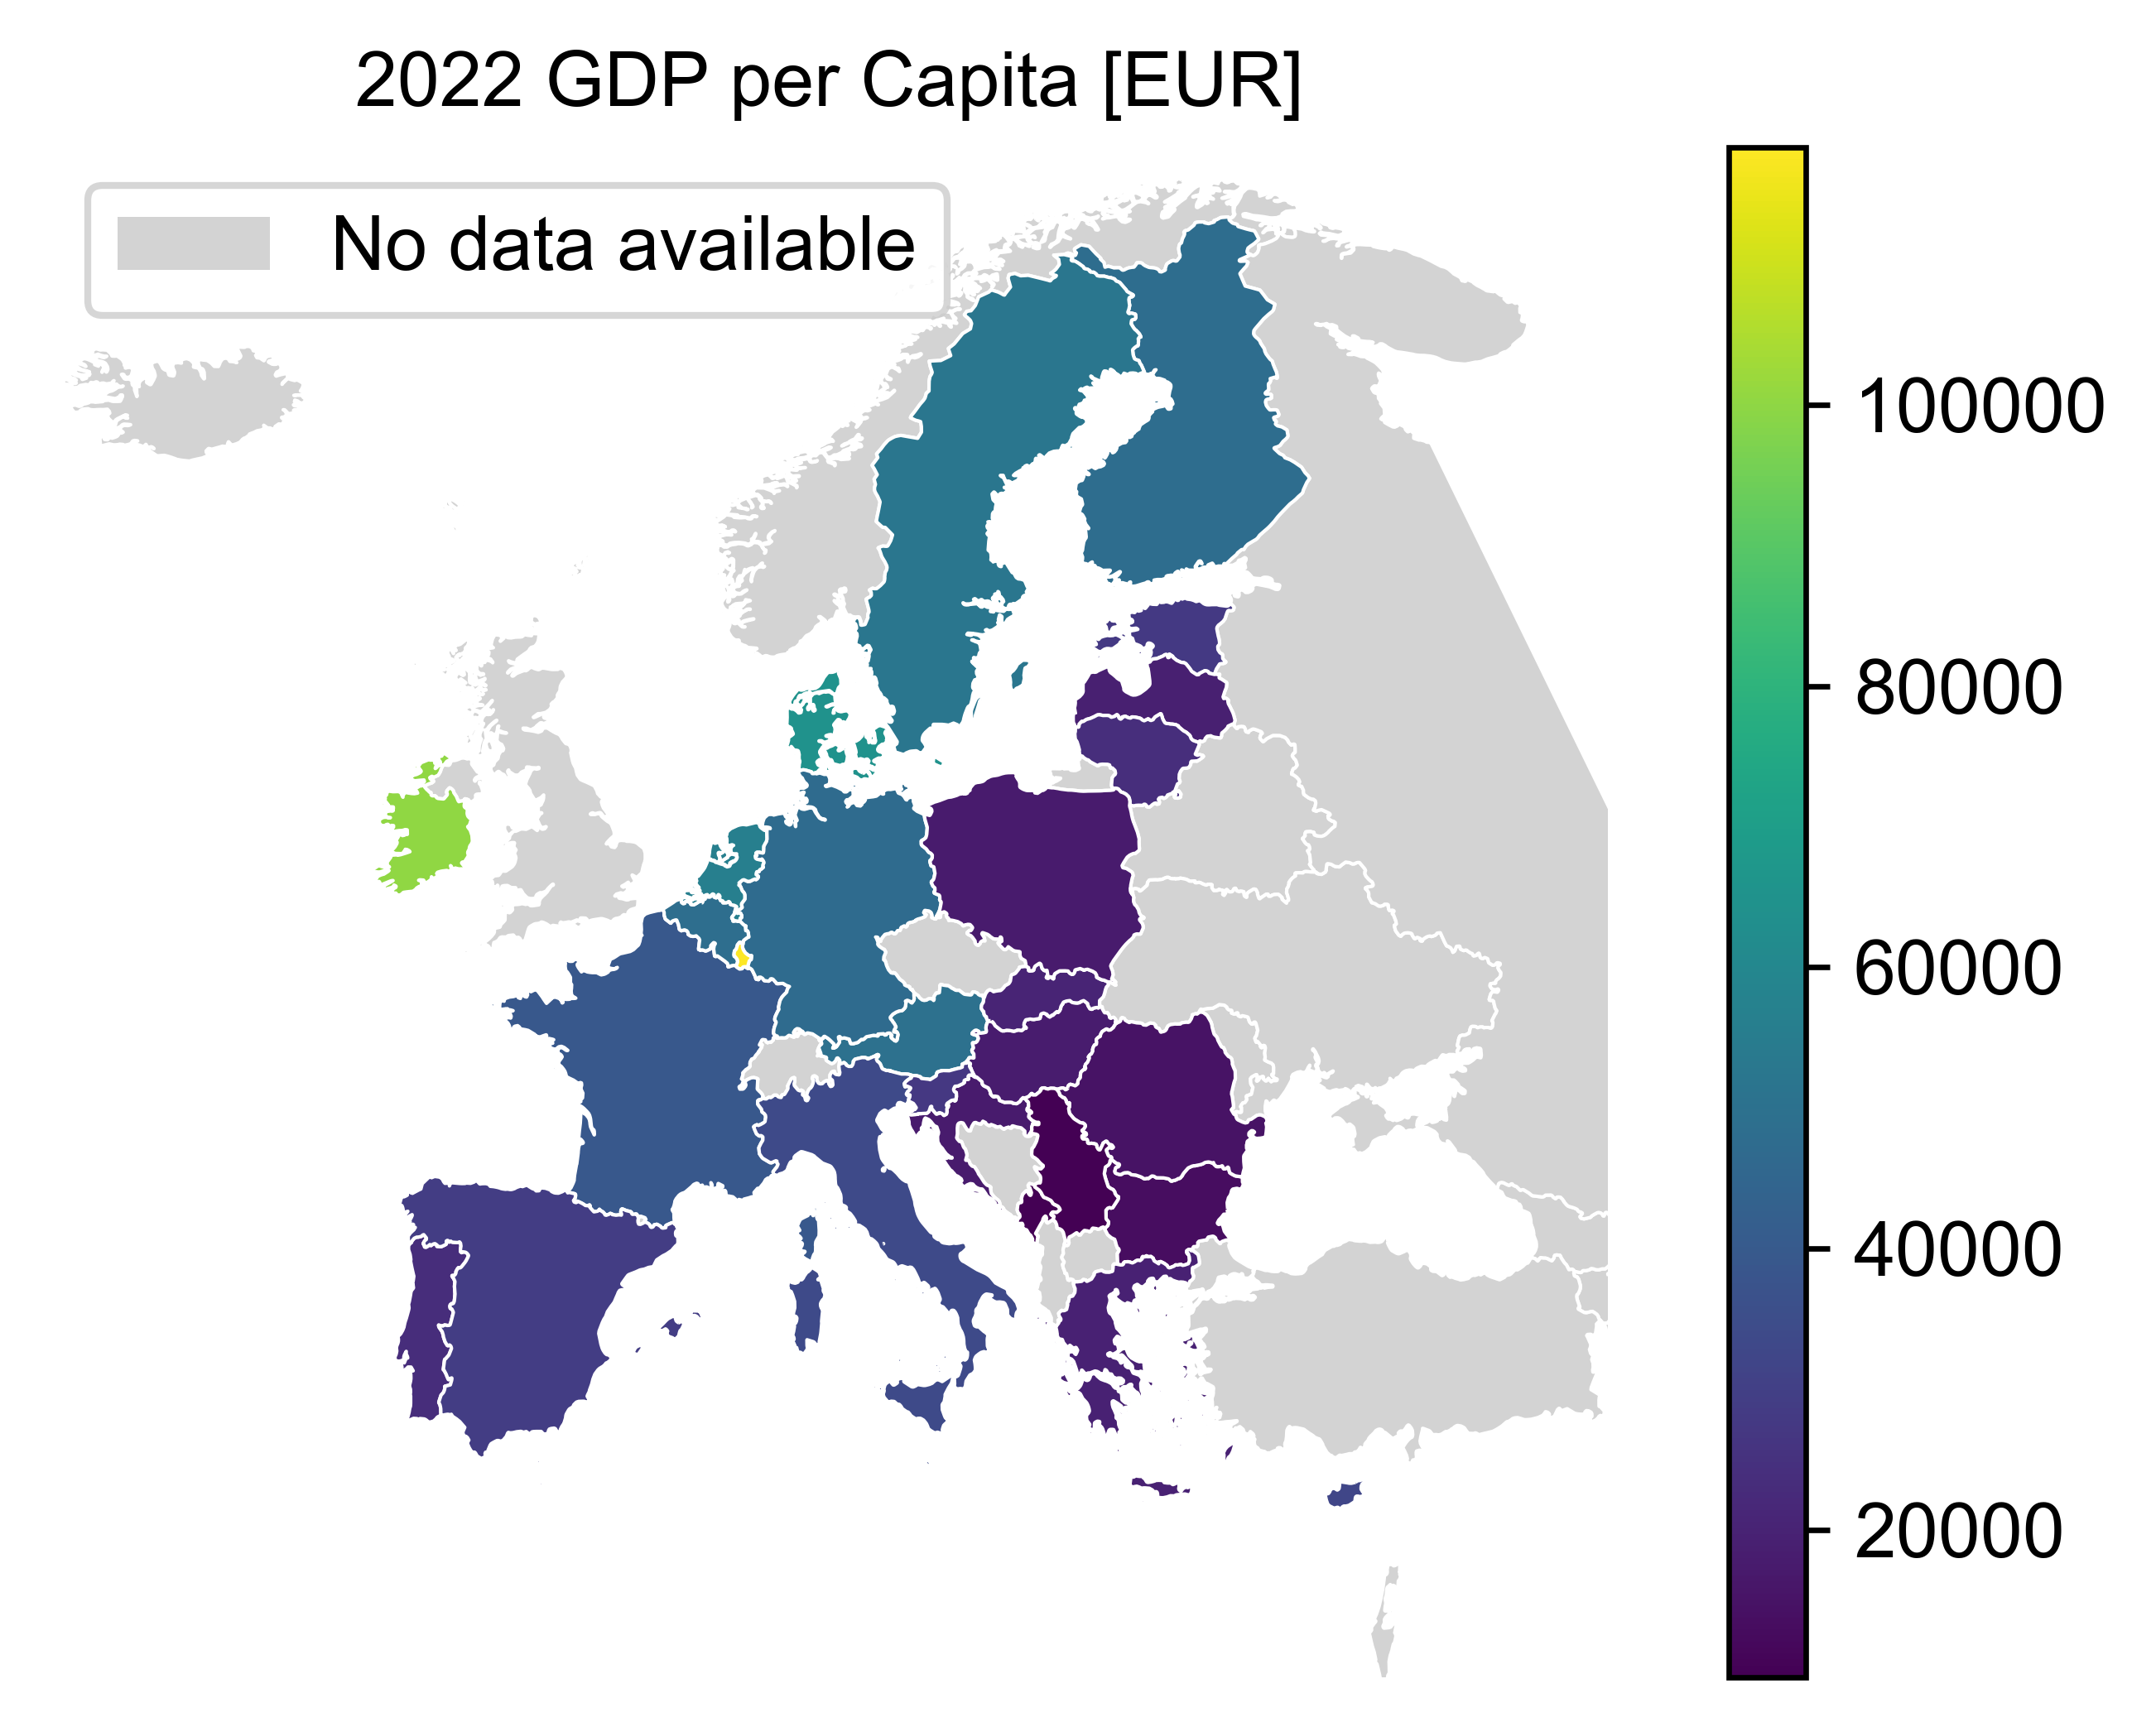

In [106]:


fig, ax = plt.subplots(figsize=(6.27, 4), dpi=600)



gdf = europe.join(raw_2022, on='NAME', how='left')

no_data = gdf[gdf['GDP per cap'].isna()]
no_data.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

has_data = gdf[gdf['GDP per cap'].notna()]
has_data.plot(ax=ax, column='GDP per cap', cmap='viridis', legend=True,
              edgecolor='white', linewidth=0.5)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightgray', label='No data available')]
ax.legend(handles=legend_elements, loc='upper left')

ax.set_xlim(-25, 45)
ax.set_ylim(30, 72)
ax.set_title(f'2022 GDP per Capita [EUR]', fontsize=11)


ax.axis('off')
plt.savefig('./exports/gdp_2022.svg')

In [112]:
raw_2022.dropna()['GDP per cap'].describe()

count        28.000000
mean      36792.857143
std       25150.229048
min       10100.000000
25%       19475.000000
50%       28050.000000
75%       47975.000000
max      118300.000000
Name: GDP per cap, dtype: float64

<Axes: xlabel='Country'>

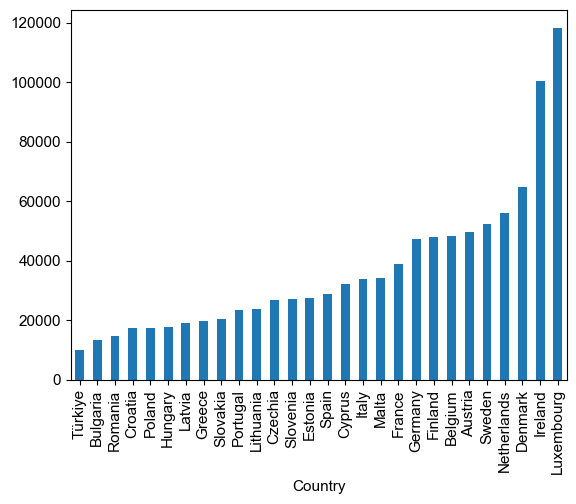

In [117]:
raw_2022.dropna()['GDP per cap'].sort_values().plot(kind='bar')

<Axes: xlabel='Year', ylabel='GDP per Capita'>

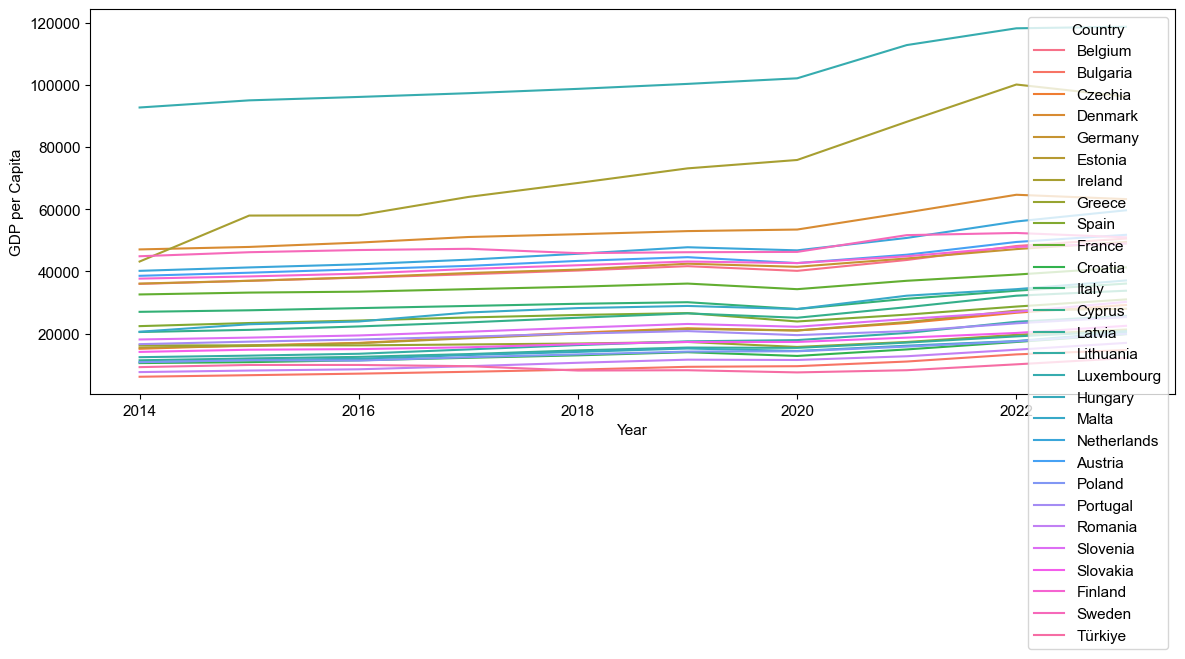

In [98]:
fig, ax = plt.subplots(1,1, figsize=(14,5))
sns.lineplot(gdp_cap.set_index('Country').loc[raw_2022.dropna().index].melt(var_name='Year', value_name='GDP per Capita', ignore_index=False),
            x='Year',
            y='GDP per Capita',
            hue='Country')

In [122]:
adjusted_2022 = raw_2022.dropna()[:-1]

In [123]:
adjusted_2022['GDP per cap'].describe()

count        27.000000
mean      37781.481481
std       25068.767529
min       13300.000000
25%       19900.000000
50%       28700.000000
75%       48050.000000
max      118300.000000
Name: GDP per cap, dtype: float64

In [124]:
adjusted_2022['GDP per cap'].median()

28700.0

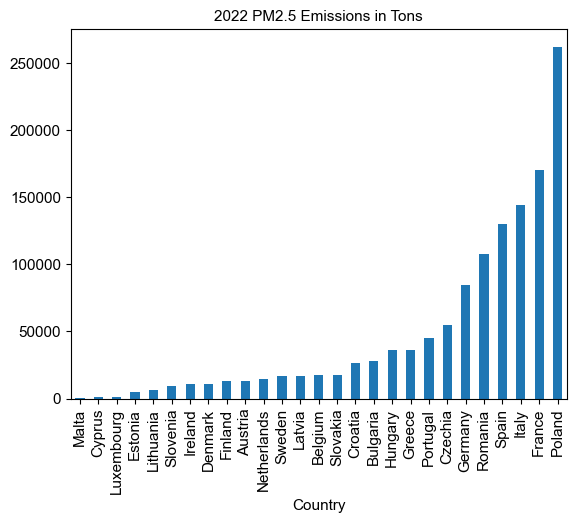

In [133]:
adjusted_2022['pm25'].sort_values().plot(kind='bar')
plt.title('2022 PM2.5 Emissions in Tons', fontsize=11)
plt.savefig('./exports/pm25_hist.svg')

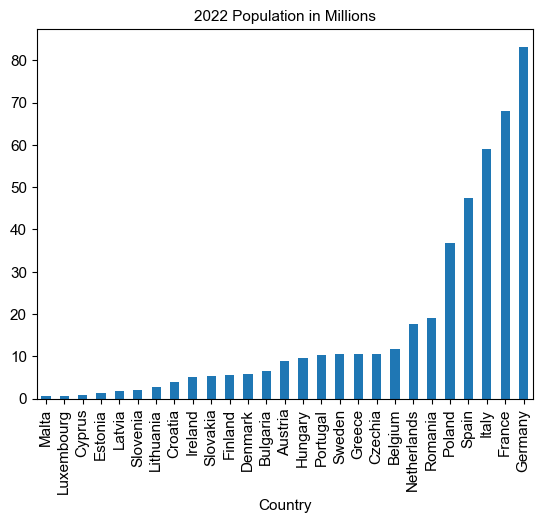

In [134]:
adjusted_2022['population'].sort_values().map(lambda x: x/1000000).plot(kind='bar')
plt.title('2022 Population in Millions', fontsize=11)
plt.savefig('./exports/pop_hist.svg')